In [1]:
import tensorflow as tf
import import_ipynb
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras import layers

from keras.layers import Input, Add, Dense,GlobalAvgPool2D, Concatenate, AvgPool2D, Dropout, ReLU, Activation, MaxPool2D, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model, Sequential

from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
import cv2
import os 
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import imshow
%matplotlib inline

from keras import backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)



In [2]:
train = ImageDataGenerator(rescale= 1./299)

validation = ImageDataGenerator(rescale= 1./299)

test= ImageDataGenerator(rescale= 1./255)

In [3]:
train_dataset= train.flow_from_directory('basedata/training', 
                                         target_size= (299, 299),
                                         class_mode= 'categorical')

validation_dataset= validation.flow_from_directory('basedata/validation', 
                                                    target_size= (299, 299),
                                                    class_mode= 'categorical')  

test_dataset= test.flow_from_directory('basedata/test',
                                       target_size= (224, 224),
                                       class_mode= 'categorical') 




Found 1400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [4]:
model_d= tf.keras.applications.xception.Xception()

In [5]:
x= model_d.layers[-3].output
#
x = GlobalAveragePooling2D()(x) # convert data into flattern for Dense layer

# add fully connected layer
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

# lets build the model
model = Model(inputs= model_d.input, outputs=predictions)

In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [7]:
for layer in model.layers[:-7]:
    layer.trainable= False

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [9]:
model.compile(optimizer= Adam(lr= 1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history= model.fit(train_dataset, 
                   steps_per_epoch= 25, 
                   validation_data= validation_dataset, 
                   validation_steps= 3,
                   shuffle=2, 
                   verbose=1, 
                   epochs = 20, 
                   batch_size = 64)

Epoch 1/20
25/25 [==============================] - 281s 11s/step - loss: 0.3304 - accuracy: 0.8500 - val_loss: 0.2116 - val_accuracy: 0.9375
Epoch 2/20
25/25 [==============================] - 260s 10s/step - loss: 0.1267 - accuracy: 0.9500 - val_loss: 0.1194 - val_accuracy: 0.9896
Epoch 3/20
25/25 [==============================] - 252s 10s/step - loss: 0.0804 - accuracy: 0.9735 - val_loss: 0.0848 - val_accuracy: 0.9792
Epoch 4/20
25/25 [==============================] - 250s 10s/step - loss: 0.0623 - accuracy: 0.9811 - val_loss: 0.0397 - val_accuracy: 1.0000
Epoch 5/20
25/25 [==============================] - 249s 10s/step - loss: 0.0359 - accuracy: 0.9912 - val_loss: 0.0456 - val_accuracy: 0.9896
Epoch 6/20
25/25 [==============================] - 251s 10s/step - loss: 0.0380 - accuracy: 0.9862 - val_loss: 0.0209 - val_accuracy: 1.0000
Epoch 7/20
25/25 [==============================] - 253s 10s/step - loss: 0.0402 - accuracy: 0.9862 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 

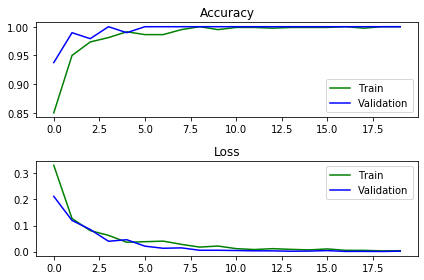


train_accuracy :  [0.8500000238418579, 0.949999988079071, 0.9734848737716675, 0.9810606241226196, 0.9911616444587708, 0.9862499833106995, 0.9862499833106995, 0.9949495196342468, 1.0, 0.9949495196342468, 0.9987373948097229, 0.9987499713897705, 0.997474730014801, 0.9987373948097229, 0.9987373948097229, 0.9987373948097229, 1.0, 0.997474730014801, 1.0, 1.0]
valid_accuracy :  [0.9375, 0.9895833134651184, 0.9791666865348816, 1.0, 0.9895833134651184, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
train_err :  [0.3304402530193329, 0.1267360895872116, 0.08036473393440247, 0.062306784093379974, 0.035930950194597244, 0.03799907863140106, 0.04020685702562332, 0.027785982936620712, 0.017361288890242577, 0.021397139877080917, 0.011460471898317337, 0.008003492839634418, 0.011357413604855537, 0.008672814816236496, 0.0066092973574995995, 0.01035827212035656, 0.004968767985701561, 0.004890230018645525, 0.0028969726990908384, 0.003563459264114499]
valid_err :  [0.211610600352

In [11]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
# plot loss and accuracy
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"], color="g", label="Train")
plt.plot(history.history["val_accuracy"], color="b", label="Validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"], color="g", label="Train")
plt.plot(history.history["val_loss"], color="b", label="Validation")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

print()
train_accuracy = history.history["accuracy"]
valid_accuracy = history.history["val_accuracy"]

train_err = history.history["loss"]
valid_err = history.history["val_loss"]


print("train_accuracy : ", train_accuracy)
print("valid_accuracy : ", valid_accuracy)
print("train_err : ", train_err)
print("valid_err : ", valid_err)

In [12]:
test_labels= test_dataset.classes
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
test_dataset.class_indices

{'Exudates': 0, 'Normal': 1}

In [14]:
predictions= model.predict(test_dataset, steps=1, verbose= 0)


In [15]:
for i in predictions:
    print(i)

[9.9999952e-01 4.6409386e-07]
[3.133863e-04 9.996866e-01]
[8.2568775e-05 9.9991739e-01]
[1.9995864e-06 9.9999797e-01]
[0.05956382 0.9404362 ]
[9.9999952e-01 4.6299533e-07]
[9.9956042e-01 4.3962666e-04]
[0.00132768 0.99867237]
[9.9966455e-01 3.3549548e-04]
[9.9990654e-01 9.3449402e-05]
[1.0000000e+00 2.6741773e-09]
[0.00529806 0.9947019 ]
[2.5871731e-04 9.9974126e-01]
[0.03882835 0.9611716 ]
[6.6144923e-05 9.9993384e-01]
[1.0000000e+00 7.4130616e-13]
[0.0326723 0.9673277]
[5.3638647e-05 9.9994636e-01]
[9.999999e-01 8.062030e-08]
[0.04786226 0.95213777]
[9.9999964e-01 3.2144089e-07]
[1.0000000e+00 5.6516882e-08]
[0.99894685 0.00105315]
[0.71432275 0.28567725]
[0.9972516  0.00274848]
[3.7899363e-04 9.9962103e-01]
[0.21482643 0.78517354]
[9.9982578e-01 1.7428756e-04]
[0.82581854 0.17418145]
[1.0000000e+00 2.8577787e-12]


In [16]:
rounded_predictions= np.argmax(predictions, axis=-1)

for i in rounded_predictions:
    print(i)

0
1
1
1
1
0
0
1
0
0
0
1
1
1
1
0
1
1
0
1
0
0
0
0
0
1
1
0
0
0


In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

score, accuracy = model.evaluate(test_dataset,
                            batch_size=32)
print('Test score:', score)
print('Test accuracy:', accuracy)

1/1 [==============================] - 0s 0s/step - loss: 0.5920 - accuracy: 0.9000
Test score: 0.5920432806015015
Test accuracy: 0.8999999761581421
